# Цель

Не менее 20000 символов.
уменьшить размерность текста, используя метод главных компонент, при этом обеспечить сохранение информации не менее 80%


# Задачи:

- осуществить загрузку текста, токенизацию

- почистить данные (числа, знаки препинания, символы, стоп-слова)

- осуществить лемматизацию

- перевести в векторное представление

- применить метод главных компонент таким образом, чтобы потеря информации составила не более 20%


In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import spacy 
from spacy.lang.ru import Russian
from spacy.lang.ru.stop_words import STOP_WORDS
nlp = spacy.load("ru_core_news_sm")

from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pymorphy2
morph = pymorphy2.MorphAnalyzer() #добавление анализатора для морфологического анализа текста

from collections import Counter

#загрузим текст
inp = open('Palata-6.txt')
book = inp.read() #оригинальный загруженный файл
#убираем табуляцию и ненужные знаки препинания
def clean_data(clean_string):
    clean_string = re.sub('I', '', clean_string)
    clean_string = re.sub('V', '', clean_string)
    clean_string = re.sub('X', '', clean_string)
    clean_string = re.sub('[\n«»:;,–]', ' ', clean_string)
    clean_string = " ".join(clean_string.split())
    return clean_string

clean_book = clean_data(book)

nlp_book = nlp(clean_book) #приводим к nlp модели, чтобы токенизации и более глубокой очистке текста


def clean_sent(sentense):
    lemm_words = []
    clean_sent = re.sub('[.?!]', '', sentense)
    words = clean_sent.split()
    for item in words:
        lemm_words.append(morph.parse(item)[0].normal_form) #лемматизация предложения
    lemm_words_without_sw = [word for word in lemm_words if not word in STOP_WORDS] #удаление стоп слов
    return lemm_words_without_sw

cleaned_text = []
for sent in nlp_book.sents:
    sentense = clean_sent(sent.text)
    cleaned_text.append(sentense)

## После очистки текста векторизируем слова. Для векторизации применяем метод word2vec

In [2]:
model = Word2Vec(min_count=1, window = 3, sorted_vocab = True)
model.build_vocab(cleaned_text)
model.train(cleaned_text, total_examples=model.corpus_count, epochs=model.epochs)

(47196, 49620)

## После векторизации соберем уникальные слова в отедльный датафрейм для уменьшения размерности и последующей визуализации. Для уменьшения размерности будет использоваться PCA, а затем TSNE

In [3]:
list_of_words = [item for sublist in cleaned_text for item in sublist]
unique_words = set(list_of_words)
unique_words = list(unique_words)

In [4]:
df_unique_words =  pd.DataFrame()

def insert_vectors_in_df(word):
    vector = model.wv.get_vector(word)
    df_unique_words[word] = vector
    
    
for word in unique_words:
    insert_vectors_in_df(word)
    
df_unique_words

C:\Users\User\AppData\Local\Temp/ipykernel_8356/1304836199.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_unique_words[word] = vector


,тогда,вперёд,вопрос,утро,неумелость,последний,стремиться,размах,возбуждение,закалить,...,вокруг,улыбнуться,посетить,маша,наклонение,современный,умирать,предрассудок,ловушка,распятие
0,0.001680,-0.003296,0.004990,-0.003883,-0.000430,-0.004266,0.000392,-0.000472,-0.004103,0.004732,...,-0.001232,-0.002128,0.001405,-0.002759,-0.002379,-0.000292,0.000991,-0.004483,-0.004336,0.000168
1,-0.003986,0.004341,-0.001427,-0.003735,-0.003386,0.003045,-0.004271,0.004994,0.001386,0.004128,...,0.003849,0.001225,0.000143,0.000446,-0.002191,-0.004892,0.005046,-0.002617,-0.003927,0.001813
2,-0.000118,-0.000639,-0.001195,-0.002622,0.001685,0.003971,-0.003293,0.004496,-0.000177,-0.002368,...,-0.004335,-0.002135,-0.004681,-0.002880,-0.002096,0.002408,0.000406,-0.003158,0.000930,-0.002737
3,-0.003627,0.003291,0.003340,0.002182,-0.002001,0.000842,0.004893,0.003169,-0.000676,-0.001632,...,-0.001268,-0.004860,-0.000004,-0.002319,0.001318,-0.003588,-0.002689,0.002239,0.001855,-0.000793
4,0.004684,0.002998,-0.004093,-0.004014,-0.001576,-0.003454,0.003183,0.001222,-0.004180,-0.003697,...,0.004092,-0.000987,-0.000055,0.001933,0.002573,-0.004791,0.001692,-0.003989,-0.004731,-0.002779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002596,0.001739,-0.003676,-0.003513,0.002179,0.000145,-0.002883,0.000672,0.002142,0.002135,...,-0.003916,0.001970,-0.003762,0.002861,-0.001940,-0.004440,0.003421,0.004012,-0.000985,-0.001971
96,0.002952,-0.003890,0.004645,-0.004091,-0.003200,-0.005118,-0.000892,-0.003319,-0.001732,0.001829,...,-0.003238,0.003887,-0.000505,-0.000134,-0.004173,0.002135,0.001996,-0.003935,-0.001303,0.001179
97,-0.004798,-0.004884,0.002988,-0.003850,-0.000785,-0.003557,-0.001746,0.002084,-0.004948,-0.000459,...,0.003889,-0.000555,0.002917,-0.003947,0.000929,0.004196,0.000856,-0.002912,0.001577,0.001250
98,0.000979,0.003166,0.004337,0.001395,0.004220,0.003630,0.001483,0.003887,-0.003442,0.004618,...,0.003992,0.000156,0.000813,-0.004044,0.000044,-0.001805,-0.004392,0.003808,-0.002057,-0.001963


In [5]:
df_unique_words.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
тогда,0.001680,-0.003986,-0.000118,-0.003627,0.004684,0.004392,-0.001941,-0.002650,0.002020,-0.004055,...,0.004400,0.000469,-0.001285,0.002035,-0.000035,0.002596,0.002952,-0.004798,0.000979,-0.004796
вперёд,-0.003296,0.004341,-0.000639,0.003291,0.002998,0.002528,0.003181,0.002761,0.003518,0.000166,...,0.001309,0.004549,0.004338,-0.003643,0.001861,0.001739,-0.003890,-0.004884,0.003166,0.000917
вопрос,0.004990,-0.001427,-0.001195,0.003340,-0.004093,0.001070,-0.003095,0.001403,0.005190,-0.000578,...,-0.004446,0.000160,-0.001413,0.003182,-0.000529,-0.003676,0.004645,0.002988,0.004337,-0.005321
утро,-0.003883,-0.003735,-0.002622,0.002182,-0.004014,0.003433,-0.002586,0.004473,0.001988,-0.004205,...,-0.002984,-0.002389,-0.002977,0.002333,-0.000278,-0.003513,-0.004091,-0.003850,0.001395,0.000690
неумелость,-0.000430,-0.003386,0.001685,-0.002001,-0.001576,-0.000200,0.000616,-0.001334,0.000519,-0.002099,...,0.002601,0.004233,0.004684,0.002076,-0.001298,0.002179,-0.003200,-0.000785,0.004220,-0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
современный,-0.000292,-0.004892,0.002408,-0.003588,-0.004791,-0.002466,0.000561,0.000766,0.004126,0.002442,...,-0.001049,0.004067,-0.000744,-0.001660,-0.003992,-0.004440,0.002135,0.004196,-0.001805,0.000242
умирать,0.000991,0.005046,0.000406,-0.002689,0.001692,-0.000517,0.002787,-0.001374,-0.004615,0.000363,...,-0.002655,-0.003312,-0.003213,-0.004275,-0.002670,0.003421,0.001996,0.000856,-0.004392,-0.000245
предрассудок,-0.004483,-0.002617,-0.003158,0.002239,-0.003989,-0.000748,-0.003197,-0.000490,-0.001252,0.001628,...,0.004023,-0.000362,-0.000252,-0.002326,0.001355,0.004012,-0.003935,-0.002912,0.003808,0.004780
ловушка,-0.004336,-0.003927,0.000930,0.001855,-0.004731,-0.002558,-0.000019,0.000851,-0.004584,0.000457,...,0.001199,-0.003340,-0.001411,0.003725,-0.001007,-0.000985,-0.001303,0.001577,-0.002057,-0.004421


In [6]:
model_PCA = PCA(n_components=80)

df_PCA = model_PCA.fit_transform(df_unique_words.T)

df_PCA = pd.DataFrame(df_PCA, index=df_unique_words.columns)
df_PCA

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
тогда,0.002933,-0.009161,-0.002285,0.000696,-0.000256,-0.005027,0.000225,0.003287,0.005173,-0.001085,...,0.003982,-0.004550,0.000691,-0.001232,0.000501,0.001738,-0.000862,0.001853,0.001829,0.000620
вперёд,-0.002921,0.003653,-0.003597,-0.000558,0.001908,0.004436,0.007049,-0.001205,0.005353,0.005277,...,-0.001349,-0.001519,-0.000593,0.003278,0.001605,-0.001472,0.002806,0.000404,-0.000644,-0.003821
вопрос,0.001077,0.003216,0.001718,-0.006661,-0.002549,-0.001570,-0.003536,-0.005951,-0.003666,0.001909,...,0.000971,0.000438,0.002793,0.001562,-0.002362,-0.006066,-0.003375,0.001513,-0.003495,-0.000579
утро,0.002896,0.000865,0.003264,0.004261,-0.003855,-0.000449,0.001851,-0.003876,-0.001663,0.002363,...,-0.001784,0.001197,-0.004442,-0.001823,-0.002059,-0.000791,-0.002822,-0.002779,0.004124,0.001333
неумелость,-0.001288,-0.004286,-0.000282,-0.008041,0.002282,0.000720,-0.000135,0.001586,0.001473,-0.001248,...,0.003580,-0.000407,-0.001250,0.005031,-0.001462,0.003673,-0.000319,-0.000625,0.001183,0.000623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
современный,0.002291,-0.000161,0.003575,0.004687,0.003990,-0.000182,-0.000945,0.002294,0.000635,-0.001527,...,-0.004145,-0.001750,-0.000058,-0.001797,-0.000287,-0.002493,-0.001835,0.001907,-0.005716,-0.002152
умирать,0.001591,-0.002095,0.000998,-0.002665,-0.002863,0.005047,-0.001800,0.005139,-0.007529,-0.001631,...,-0.006482,-0.002499,-0.000203,-0.001455,0.006174,0.006876,0.000948,0.002144,0.001862,-0.000031
предрассудок,0.004256,-0.000715,0.004698,0.003423,0.002405,-0.002699,-0.000884,-0.000024,-0.000731,-0.003160,...,-0.002575,-0.000341,-0.000578,-0.001137,0.004920,0.000149,0.002435,0.006079,0.001855,0.002323
ловушка,-0.000139,0.002830,0.005133,-0.002630,-0.002880,-0.002629,-0.001111,0.002036,0.003599,-0.001619,...,-0.000915,-0.002016,-0.003133,-0.002621,-0.000369,-0.000654,0.000924,-0.000459,-0.000298,-0.000784


In [21]:
#Применим TSNE
df_TSNE = TSNE(n_components=2, init='random', perplexity=3).fit_transform(df_PCA)
df_TSNE = pd.DataFrame(df_TSNE, index=df_unique_words.columns)

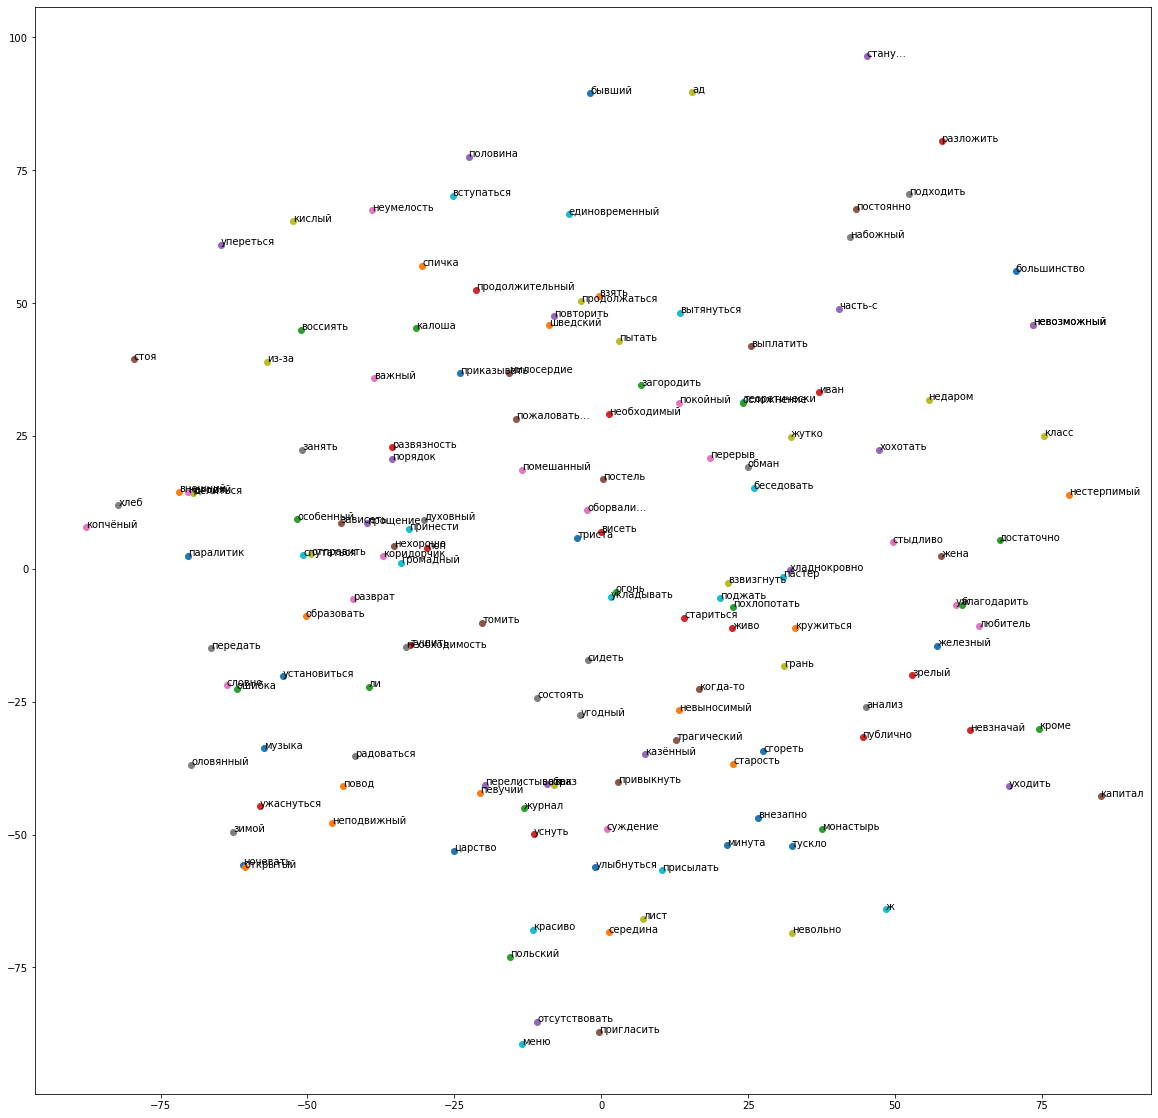

In [8]:
plt.figure(figsize=(20,20))

for x in range (150):
    rnd = np.random.RandomState().randint(0,df_TSNE.shape[0]-1)
    word = df_TSNE.iloc[rnd]
    x_c=list(word)[0]
    y_c=list(word)[1]
    plt.scatter(x=x_c, y=y_c)
    plt.annotate(word.name, (x_c, y_c))